In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scrapy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import matplotlib.patches as mpatches
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn import metrics

In [2]:
dogs = pd.read_csv('dog_breed.csv')
dogs.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
0,0,Menu,Assisting rescues and pet owners in dog breed ...,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Menu,What kind of dog is right for you?,© Dog Breed Info Center® All Rights Reserved,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Menu,The Indian Hare Dog,"Thylacine, The Australian Tiger Dog",Cordoba Fighting Dog,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Menu,Full List of Mix Breed Dogs,Full List of Purebred Dogs Mixed With...,ACHC Recognized Hybrid Dogs,DDKC Recognized Hybrid Dogs,IDCR Recognized Hybrid Dogs,DBR Recognized Mixed Breed Dogs,Chihuahua Mixed Breed Dogs,Cocker Spaniel Mixed Breed Dogs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Menu,To see a list excluding mix breed dogs visit P...,Want More Search Options?,New breeds and mixes are being added on a regu...,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dogs_main = dogs.drop(index=dogs.index[[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]])

In [ ]:
#dogs_revise = dogs_main.drop([154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,309,310,311,312,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943])

In [3]:
name_urls = 'https://www.dogbreedinfo.com/purebred.htm'
import requests 
page1= requests.get(name_urls)

from bs4 import BeautifulSoup 
soup1 = BeautifulSoup(page1.content, 'html.parser')

In [4]:
print(soup1.prettify())

<!DOCTYPE doctype html>
<!--[if lt IE 7]> <html class="ie6 oldie"> <![endif]-->
<!--[if IE 7]>    <html class="ie7 oldie"> <![endif]-->
<!--[if IE 8]>    <html class="ie8 oldie"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="" lang="en-US">
 <!-- InstanceBegin template="/Templates/Mains.dwt" codeOutsideHTMLIsLocked="false" -->
 <!--<![endif]-->
 <head>
  <!--
  ~ Copyright (C) 2014-2015 Media.net Advertising FZ-LLC All Rights Reserved
  -->
  <script type="text/javascript">
   window._mNHandle = window._mNHandle || {};
   window._mNHandle.queue = window._mNHandle.queue || [];
   medianet_versionId = "3121199";
  </script>
  <script async="async" src="//contextual.media.net/dmedianet.js?cid=8CU7I72PJ">
  </script>
  <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
  <script>
   (adsbygoogle = window.adsbygoogle || []).push({ google_ad_client: "ca-pub-5852786167000487", enable_page_level_ads: true });
  </script>
  <!-- Global site tag (gtag

In [5]:
format_name = []

In [6]:
for a in soup1.find_all('a', href=True): 
    format_name.append(a.text)

In [7]:
format_name

['Home',
 'All Breeds',
 'Purebreds',
 'Mix Breed Dogs',
 "Research your dog's mix",
 'Understanding Dog Behavior',
 'Housebreaking',
 'Raising a Puppy',
 'Search Categories',
 'Dog Quizzes',
 'Dogs Caught!',
 'Other Pets',
 'All Creatures',
 'Care Training+',
 'Whelping Puppies',
 'More Pictures',
 'Submit your Picture',
 'Spike the Bulldog',
 'Scam Warning',
 'Menu',
 'Want More Search Options?',
 'extinct breeds',
 'Hybrid Dogs',
 'All Purebred and Cross Breeds',
 'Search Category',
 'Search by Category',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P-Q',
 'R',
 'S',
 'T',
 'U-V',
 'W',
 'X-Y-Z',
 'Abruzzenhund',
 'Affenpinscher',
 'Afghan Hound',
 'Africanis',
 'Aidi',
 'Ainu Dog',
 'Airedale Terrier',
 'Akbash Dog',
 'Akitas',
 'Akita (American)',
 'Akita Inu (Japanese)',
 'Alano Español',
 'Alapaha Blue Blood Bulldog',
 'Alaskan Husky',
 'Alaskan Klee Kai',
 'Alaskan Malamute',
 'Alopekis',
 'Alpine Dachsbracke',
 'American Allaunt',

In [8]:
dogs.shape

(981, 58)

In [9]:
len(format_name)

1126

In [10]:
dogs.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56'],
      dtype='object')

In [13]:
dogs['Dog_Name'] = format_name[19:1000]
dogs

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,48,49,50,51,52,53,54,55,56,Dog_Name
0,0,Menu,Assisting rescues and pet owners in dog breed ...,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Menu
1,1,Menu,What kind of dog is right for you?,© Dog Breed Info Center® All Rights Reserved,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Want More Search Options?
2,2,Menu,The Indian Hare Dog,"Thylacine, The Australian Tiger Dog",Cordoba Fighting Dog,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extinct breeds
3,3,Menu,Full List of Mix Breed Dogs,Full List of Purebred Dogs Mixed With...,ACHC Recognized Hybrid Dogs,DDKC Recognized Hybrid Dogs,IDCR Recognized Hybrid Dogs,DBR Recognized Mixed Breed Dogs,Chihuahua Mixed Breed Dogs,Cocker Spaniel Mixed Breed Dogs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hybrid Dogs
4,4,Menu,To see a list excluding mix breed dogs visit P...,Want More Search Options?,New breeds and mixes are being added on a regu...,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All Purebred and Cross Breeds
5,5,Menu,What kind of dog is right for you?,© Dog Breed Info Center® All Rights Reserved,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Search Category
6,6,Menu,What kind of dog is right for you?,© Dog Breed Info Center® All Rights Reserved,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Search by Category
7,7,Menu,Search by Category,To see a full list including hybrids visit All...,Want More Search Options?,Information and photos are being added on a re...,"The definition of a ""purebred"" in the dictiona...",The following list consists of purebred dogs a...,List of Purebred Dogs,A to Z - Dog Breeds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
8,8,Menu,Search by Category,To see a full list including hybrids visit All...,Want More Search Options?,Information and photos are being added on a re...,"The definition of a ""purebred"" in the dictiona...",The following list consists of purebred dogs a...,List of Purebred Dogs,A to Z - Dog Breeds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
9,9,Menu,Search by Category,To see a full list including hybrids visit All...,Want More Search Options?,Information and photos are being added on a re...,"The definition of a ""purebred"" in the dictiona...",The following list consists of purebred dogs a...,List of Purebred Dogs,A to Z - Dog Breeds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C


In [30]:
dogs_main = dogs.drop([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,309,310,311,312,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972])
dogs_main

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,48,49,50,51,52,53,54,55,56,Dog_Name
29,29,Menu,"Piazza Navona (Pia), age 15 in the front and S...","The Maremma Sheepdog is a massive, noble, dist...",The Maremma is a friendly and well-balanced fl...,Height: 23.5 - 28.5 inches (60 - 73 cm)\n\t\t ...,-,The Maremma Sheepdog is not recommended for ap...,This breed needs space—mental as well as physi...,About 11-13 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abruzzenhund
30,30,Menu,"""Avantgarde Affenpinschers is a top UK Affenpi...",AFF-en-pin-sher,The Affenpinscher is a small dog with a shaggy...,The Affenpinscher has a terrier-like personali...,Height: 10 - 15 inches (25 - 38 cm)\n\t\t We...,"Some are prone to fractures, slipped stifle, P...",The Affenpinscher is good for apartment life. ...,The Affenpinscher needs a daily walk. While ou...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Affenpinscher
31,31,Menu,Teddy the Afghan Hound at 18 months old,NaN,The Afghan Hound is considered an aristocratic...,"Courageous, dignified, spirited, very sweet, l...",Height: Males 27 - 29 inches (68.58 - 73.66 cm...,Weight: 50 – 64 pounds (22 – 34 kg),Generally healthy.,The Afghan Hound is not recommended for apartm...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghan Hound
32,32,Menu,"""This is a very good example of what has now b...",---,The Africanis can come in any color. The coat ...,The Africanis is very loyal and courageous wit...,Height: 20-24 inches (50-60 cm),Weight: 55-100 inches (25-45 kg),Fairly healthy breed. The ridgeback types have...,The Africanis will do ok in an apartment and w...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africanis
33,33,Menu,ALIF (VOBROUK) DE LA BAUME CROMAGNON—9. Septem...,--,The Aidi is lean and muscular. It has a heavy ...,"Energetic and highly protective, the Aidi is a...",Height: 21 - 24 inches (53 - 61 cm),Weight: 50 - 55 pounds (23 - 25 kg),-,Aidi are not recommended for apartment life. T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aidi
34,34,Menu,"Katana the Hokkaido Ken at 1 year old — ""Katan...",-,"The Ainu Dog is a thin, muscular, sturdy-looki...",The Ainu Dog's character is packed full of des...,Height: 18 - 22 inches (46 - 56 cm),Weight: 45 - 65 pounds (20 - 30 kg),-,The Ainu Dog is not recommended for apartment ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ainu Dog
35,35,Menu,Cooper the Airedale Terrier at 2 years old,AIR-dail TAIR-ee-uhr,The Airedale Terrier is the largest of the ter...,The Airedale Terrier will usually do okay with...,Height: Males 22 - 24 inches (56 - 61 cm) Fema...,Weight: Males 50 - 65 pounds (23 - 29 kg) Fema...,"A very hardy breed, although some may suffer f...",The Airedale Terrier is not recommended for ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airedale Terrier
36,36,Menu,"Kuzco the Akbash—his family says, ""He loves to...",--,This solid white flock guard dog is equipped w...,"The Akbash Dog is a primitive guard dog breed,...",Height: 28 - 32 inches (71 - 81 cm),Weight: 90 - 130 pounds (41 - 59 kg),Although cases of hip dysplasia and OCD have o...,Akbash Dogs are not recommended for apartment ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akbash Dog
37,37,Menu,"There are two types of Akitas, the original Ja...",Japanese Akitas - Tamami & Akemi,American Akita - Teddy the 1-year-old Akita,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akitas
38,38,Menu,Teddy the 1-year-old Akita,"There are two types of Akitas, the original Ja...","AH-ki-ta (proper Japanese pronunciation, with ...",a-KEE-ta Inu (preferred pronunciation in the W...,American Akita AKC Standard,Massive but in balance with body; free of wrin...,"Neck—thick and muscular; comparatively short, ...","Tail—large and full, set high and carried over...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akita (American)


In [33]:
dogs_revised = dogs_main[['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', 'Dog_Name','16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56']]

In [ ]:
#dogs_revised = dogs_main[['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', 'Dog_Name','16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56']]

In [35]:
#dogs_update= dogs_revised.iloc[:,2:18]
#dogs_update

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Dog_Name
29,"Piazza Navona (Pia), age 15 in the front and S...","The Maremma Sheepdog is a massive, noble, dist...",The Maremma is a friendly and well-balanced fl...,Height: 23.5 - 28.5 inches (60 - 73 cm)\n\t\t ...,-,The Maremma Sheepdog is not recommended for ap...,This breed needs space—mental as well as physi...,About 11-13 years,About 6 to 9 puppies,"The all-weather coat requires regular, thoroug...",Some claim at one time there were two separate...,Flock Guard,Spirit the Italian Sheepdog (Maremma) from Aus...,Beau the Maremma Sheepdog at 11 months old,"Bearfoot Belle, my female Maremma Sheepdog whe...",Abruzzenhund
30,"""Avantgarde Affenpinschers is a top UK Affenpi...",AFF-en-pin-sher,The Affenpinscher is a small dog with a shaggy...,The Affenpinscher has a terrier-like personali...,Height: 10 - 15 inches (25 - 38 cm)\n\t\t We...,"Some are prone to fractures, slipped stifle, P...",The Affenpinscher is good for apartment life. ...,The Affenpinscher needs a daily walk. While ou...,About 10-14 years,"1 - 3 puppies, average 2",The Affenpinscher's harsh coat should never be...,No exact data about the Affenpinscher's origin...,"Terrier, AKC Toy",An adult Affenpinscher,An adult Affenpinscher,Affenpinscher
31,Teddy the Afghan Hound at 18 months old,NaN,The Afghan Hound is considered an aristocratic...,"Courageous, dignified, spirited, very sweet, l...",Height: Males 27 - 29 inches (68.58 - 73.66 cm...,Weight: 50 – 64 pounds (22 – 34 kg),Generally healthy.,The Afghan Hound is not recommended for apartm...,The Afghan Hound needs to be taken on a long d...,About 12 to 14 years,"1 - 15 puppies, average 8","The long, thick coat demands a great deal of a...","This is a very elegant, ancient dog, native to...","Southern, AKC Hound",The Material contained herein may not be repr...,Afghan Hound
32,"""This is a very good example of what has now b...",---,The Africanis can come in any color. The coat ...,The Africanis is very loyal and courageous wit...,Height: 20-24 inches (50-60 cm),Weight: 55-100 inches (25-45 kg),Fairly healthy breed. The ridgeback types have...,The Africanis will do ok in an apartment and w...,"If kept in a residential area, the Africanis d...",About 9-12 years,About 2 to 8 puppies,"The smooth, shorthaired, hard coat is easy to ...",South Africa,--,KUSA = Kennel Union of Southern Africa,Africanis
33,ALIF (VOBROUK) DE LA BAUME CROMAGNON—9. Septem...,--,The Aidi is lean and muscular. It has a heavy ...,"Energetic and highly protective, the Aidi is a...",Height: 21 - 24 inches (53 - 61 cm),Weight: 50 - 55 pounds (23 - 25 kg),-,Aidi are not recommended for apartment life. T...,The Aidi should be taken for long daily walks.,About 12 years,About 4 to 8 puppies,The coat is easy to groom and needs little att...,"The Aidi is recognized as coming from Morocco,...",Flock guard,The Material contained herein may not be repr...,Aidi
34,"Katana the Hokkaido Ken at 1 year old — ""Katan...",-,"The Ainu Dog is a thin, muscular, sturdy-looki...",The Ainu Dog's character is packed full of des...,Height: 18 - 22 inches (46 - 56 cm),Weight: 45 - 65 pounds (20 - 30 kg),-,The Ainu Dog is not recommended for apartment ...,The Ainu needs moderate but regular exercise t...,About 11-13 years,About 7 puppies,"The harsh, straight, double coat of the Ainu D...",The Ainu Dog is a Japanese Spitz breed rarely ...,Northern,The Material contained herein may not be repr...,Ainu Dog
35,Cooper the Airedale Terrier at 2 years old,AIR-dail TAIR-ee-uhr,The Airedale Terrier is the largest of the ter...,The Airedale Terrier will usually do okay with...,Height: Males 22 - 24 inches (56 - 61 cm) Fema...,Weight: Males 50 - 65 pounds (23 - 29 kg) Fema...,"A very hardy breed, although some may suffer f...",The Airedale Terrier is not recommended for ap...,"Airedales were bred for active work, and there...",About 10-12 years.,Average of 9 puppies,"Airedales have a hard, short-haired, double co...",The first Airedales looked compl

In [ ]:
#dogs_update.head()

In [ ]:
#dogs_update = dogs_fix.drop([154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,309,310,311,312,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943])

In [87]:
dogs_update.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', 'Dog_Name', 'combined'],
      dtype='object')

In [88]:
dogs_update.shape

(659, 17)

In [89]:
dogs_update.Dog_Name.unique()

array(['Abruzzenhund', 'Affenpinscher', 'Afghan Hound', 'Africanis',
       'Aidi', 'Ainu Dog', 'Airedale Terrier', 'Akbash Dog', 'Akitas',
       'Akita (American)', 'Akita Inu (Japanese)', 'Alano Español',
       'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai',
       'Alaskan Malamute', 'Alopekis', 'Alpine Dachsbracke',
       'American Allaunt', 'American Alsatian',
       'American Black and Tan Coonhound', 'American Blue Gascon Hound',
       'American Blue Lacy', 'American Bull Molosser', 'American Bulldog',
       'American Bullnese', 'American Bully', 'American Cocker Spaniel',
       'American English Coonhound', 'American Eskimo Dog',
       'American Foxhound', 'American Hairless Terrier',
       'American Indian Dog', 'American Lo-Sze Pugg ™',
       'American Mastiff', 'American Mastiff (Panja)',
       'American Pit Bull Terrier', 'American Staffordshire Terrier',
       'American Staghound', 'American Toy Terrier',
       'American Water Spaniel', 'Ame

In [90]:
dogs_update['combined'] = dogs_update['1']+" "+dogs_update['2']+" "+dogs_update['3']+" "+dogs_update['4']+" "+dogs_update['5']+" "+dogs_update['6']+" "+dogs_update['7']+" "+dogs_update['8']+" "+dogs_update['9']+" "+dogs_update['10']+" "+dogs_update['11']+" "+dogs_update['12']+" "+dogs_update['13']+" "+dogs_update['14']+" "+dogs_update['15']

In [91]:
corpus = dogs_update['combined'].fillna("")

In [92]:
dogs_update.combined.iloc[656]

'"Juliet, a really nice 4-year-old gal, weighing around 5 1/2 pounds (2.5 kg) (amazingly tiny)" TEE-kuhp POO-duhl The Teacup Poodle is an unofficial size variation of the Poodle. It is, in reality, a Toy Poodle, but is smaller in size than the AKC Toy Poodle standard. Breeders are purposely breeding them accordingly. Teacups are common in the States. They tend to be 9 inches or smaller, and under 6 pounds in weight. The Teacup Poodle is just a name given to very small Poodles by breeders, and therefore, there is no universal standard for those who are breeding them. When groomed to show dog standards the body is meant to give off a square appearance. It has approximately the same length as the height at the withers. The skull is moderately rounded with a slight but definite stop. It has a long, straight muzzle. The dark, oval-shaped eyes are set somewhat far apart and are black or brown. The ears hang close to the head and are long and flat. Both the front and back legs are in proporti

In [93]:
english_stop_list = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

In [73]:
with open('listfile.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(dog_stop_list, filehandle)

In [95]:
with open('listfile.data', 'rb') as filehandle:
    dog_stop_list = pickle.load(filehandle)

In [96]:
master_stop_list = english_stop_list+dog_stop_list_updated
master_stop_list

['ourselves',
 'hers',
 'between',
 'yourself',
 'but',
 'again',
 'there',
 'about',
 'once',
 'during',
 'out',
 'very',
 'having',
 'with',
 'they',
 'own',
 'an',
 'be',
 'some',
 'for',
 'do',
 'its',
 'yours',
 'such',
 'into',
 'of',
 'most',
 'itself',
 'other',
 'off',
 'is',
 's',
 'am',
 'or',
 'who',
 'as',
 'from',
 'him',
 'each',
 'the',
 'themselves',
 'until',
 'below',
 'are',
 'we',
 'these',
 'your',
 'his',
 'through',
 'don',
 'nor',
 'me',
 'were',
 'her',
 'more',
 'himself',
 'this',
 'down',
 'should',
 'our',
 'their',
 'while',
 'above',
 'both',
 'up',
 'to',
 'ours',
 'had',
 'she',
 'all',
 'no',
 'when',
 'at',
 'any',
 'before',
 'them',
 'same',
 'and',
 'been',
 'have',
 'in',
 'will',
 'on',
 'does',
 'yourselves',
 'then',
 'that',
 'because',
 'what',
 'over',
 'why',
 'so',
 'can',
 'did',
 'not',
 'now',
 'under',
 'he',
 'you',
 'herself',
 'has',
 'just',
 'where',
 'too',
 'only',
 'myself',
 'which',
 'those',
 'i',
 'after',
 'few',
 'whom',

### K Means

This method is a way to group daya into clusters of similar data points with similar variances. K Means assumes that the underlying "true" clusters are radially symmetrical. This means that they are uniform in all directions and the edges curve outward. K Means also assumes that all clusters have similar variances. This form of clustering can run more slowly as high-dimensional data tends to bog it down. In this instance, you can use mini-batch to speed it up. In the following clusters, you will see K Means and Mini-Batch clustering used

Since we are starting with K Means, let's define the features and the outcome.

In [97]:
#Tfidf can't use bigrams so need to use corpus - so maybe use this for a different feature set
vectorizer = TfidfVectorizer(max_df=0.95,min_df=2, stop_words = master_stop_list)
tfidf = vectorizer.fit_transform(corpus)

In [98]:
print(vectorizer.get_feature_names())

['119', '128', '2½yrs', 'abilities', 'adapt', 'adaptability', 'adaptable', 'adapts', 'adjust', 'adjusted', 'affection', 'affectionately', 'aggression', 'aggressive', 'aggressiveness', 'agile', 'agilely', 'agility', 'agreeable', 'aidan', 'akaroa', 'alert', 'alif', 'allergenic', 'allergic', 'allergies', 'allergy', 'alone', 'aloof', 'aloofness', 'amusing', 'animal', 'animals', 'anxiety', 'assert', 'assertive', 'athleticism', 'attached', 'attack', 'attacks', 'attention', 'attentive', 'babies', 'babrungo', 'backyard', 'bark', 'barker', 'barking', 'barks', 'baume', 'beaten', 'behaved', 'bero', 'biting', 'bouts', 'calm', 'calmly', 'career', 'cat', 'cats', 'cerberus', 'charming', 'cheerful', 'chewing', 'child', 'chloe', 'coby', 'cody', 'coma', 'companions', 'companionship', 'confident', 'confrontational', 'constant', 'courageous', 'crane', 'creature', 'cromagnon', 'dad', 'danger', 'dangerous', 'debating', 'dedicated', 'dedication', 'defend', 'defender', 'defense', 'defensive', 'deja', 'demandi

In [99]:
print(tfidf.todense())

[[0.         0.         0.         ... 0.04844512 0.         0.        ]
 [0.         0.         0.         ... 0.16661738 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14052622 0.         0.        ]
 [0.         0.         0.         ... 0.31356585 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In the code below, we will reduce the components to 2 using PCA. We will also normalize the data. Then we will calculate the predicted values and plot the solution.

In [100]:
dogs_draft = tfidf.todense()

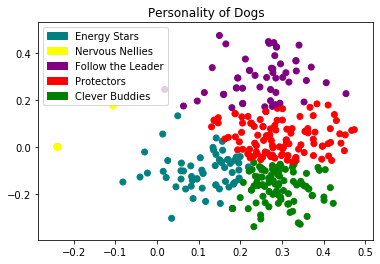

In [101]:
dog_model = normalize(dogs_draft)

dog_pca = PCA(2).fit_transform(dog_model)
dog_pred = KMeans(n_clusters=5,random_state=45).fit_predict(dog_pca)

colormap = np.array(['teal', 'yellow','purple','red','green'])
plt.scatter(dog_pca[:, 0], dog_pca[:, 1],c=colormap[dog_pred])

pop_a = mpatches.Patch(color='teal', label='Energy Stars')
pop_b = mpatches.Patch(color='yellow', label='Nervous Nellies')
pop_c = mpatches.Patch(color='purple', label='Follow the Leader')
pop_d = mpatches.Patch(color='red', label='Protectors')
pop_e = mpatches.Patch(color='green', label='Clever Buddies')

plt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e])

plt.title('Personality of Dogs')
plt.show()

In [102]:
#from sklearn import metrics
#for i in range(2,5):
    #dog_pred = KMeans(n_clusters=i, random_state=45).fit_predict(dog_pca)
    #print(metrics.silhouette_score(dog_pca, dog_pred, metric='euclidean'))

In [103]:
single_features = pd.DataFrame(dogs_draft,columns=vectorizer.get_feature_names())
single_features['K Means Clusters'] = dog_pred

In [104]:
single_features['K Means Clusters'].unique()

array([2, 4, 1, 0, 3])

In [105]:
single_features['Dog_Name']=dogs_update['Dog_Name']

In [106]:
single_features['Dog_Name'].unique()

array([nan, 'Abruzzenhund', 'Affenpinscher', 'Afghan Hound', 'Africanis',
       'Aidi', 'Ainu Dog', 'Airedale Terrier', 'Akbash Dog', 'Akitas',
       'Akita (American)', 'Akita Inu (Japanese)', 'Alano Español',
       'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai',
       'Alaskan Malamute', 'Alopekis', 'Alpine Dachsbracke',
       'American Allaunt', 'American Alsatian',
       'American Black and Tan Coonhound', 'American Blue Gascon Hound',
       'American Blue Lacy', 'American Bull Molosser', 'American Bulldog',
       'American Bullnese', 'American Bully', 'American Cocker Spaniel',
       'American English Coonhound', 'American Eskimo Dog',
       'American Foxhound', 'American Hairless Terrier',
       'American Indian Dog', 'American Lo-Sze Pugg ™',
       'American Mastiff', 'American Mastiff (Panja)',
       'American Pit Bull Terrier', 'American Staffordshire Terrier',
       'American Staghound', 'American Toy Terrier',
       'American Water Spaniel',

In [107]:
dogs_update.shape

(659, 17)

In [127]:
single_features.groupby('K Means Clusters').mean().transpose().sort_values(2,ascending=False)

K Means Clusters,0,1,2,3,4
guard,0.010067,0.001761,0.266451,0.080307,0.008354
family,0.042177,0.000000,0.228990,0.164958,0.053772
humans,0.046683,0.000000,0.188582,0.127366,0.119373
leader,0.062757,0.000000,0.158856,0.157969,0.195581
guardian,0.006412,0.000000,0.113981,0.023133,0.001592
exercise,0.142353,0.000000,0.103419,0.160216,0.150634
walk,0.105695,0.000000,0.088716,0.118926,0.173445
loyal,0.034700,0.000000,0.081339,0.079497,0.033898
calm,0.042472,0.000000,0.078841,0.074420,0.059229
people,0.066999,0.000000,0.065638,0.109375,0.084002


In [109]:
single_features[single_features['Dog_Name']=='Alaskan Klee Kai'].transpose()

,43
119,0
128,0
2½yrs,0
abilities,0
adapt,0
adaptability,0
adaptable,0
adapts,0
adjust,0
adjusted,0


In [110]:
#single_features.groupby('Dog_Name').mean().transpose()

In [111]:
single_heatmap = single_features.groupby('K Means Clusters').mean().transpose().loc[['leader','human','exercise','intelligent','walk','obedience','calm','agility','reserved','protection','watchdog','guardian','biting','family','yard','animals']]
single_heatmap

K Means Clusters,0,1,2,3,4
leader,0.062757,0.000000,0.158856,0.157969,0.195581
human,0.064072,0.000000,0.053658,0.098255,0.156068
exercise,0.142353,0.000000,0.103419,0.160216,0.150634
intelligent,0.066046,0.000000,0.060542,0.090316,0.079124
walk,0.105695,0.000000,0.088716,0.118926,0.173445
obedience,0.016950,0.000000,0.033718,0.069561,0.082902
calm,0.042472,0.000000,0.078841,0.074420,0.059229
agility,0.012577,0.000000,0.021726,0.053604,0.052610
reserved,0.044821,0.000436,0.024082,0.040330,0.027578
protection,0.005653,0.000000,0.035131,0.037807,0.005760


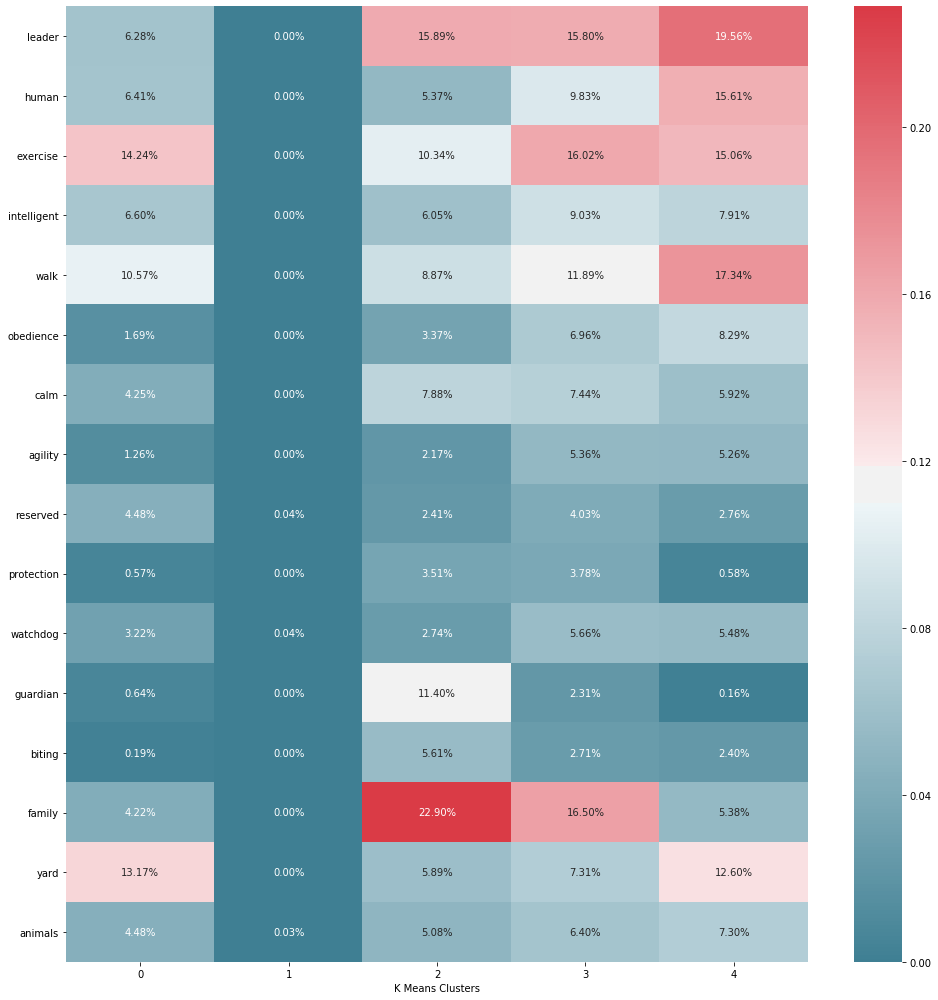

In [112]:
heat_color = sns.diverging_palette(220, 10, as_cmap = True)
#cor = single_heatmap.corr() #Calculate the correlation of the above variables
plt.figure(figsize=(14,14))
sns.heatmap(single_heatmap, annot = True, cmap = heat_color, fmt='.2%')
plt.tight_layout()

Mini Batch

In [113]:
dog_pca.shape

(659, 2)

In [114]:
#look at clusters, have more than 10 - figure out how to group dogs (by size, aggression, etc)
#put the sil score and c score after this or it will impact my clustering below
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=952)
minibatchkmeans.fit(dog_pca)

predict_mini = minibatchkmeans.predict(dog_pca)

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, dog_pred))

#test this with sil score and see if the clusters of 5 is an ideal number

Comparing k-means and mini batch k-means solutions:
col_0   0    1   2   3   4
row_0                     
0       1    0  55  18   0
1       7    2   0   0   0
2       0  337   0   0   0
3      49    0   0   0  77
4       5    0   0  92  16


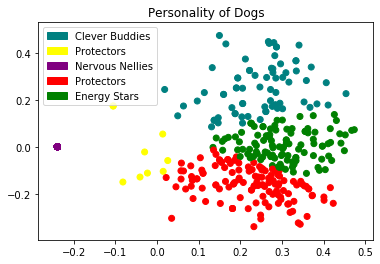

In [115]:
colormap = np.array(['teal', 'yellow','purple','red','green'])
plt.scatter(dog_pca[:, 0], dog_pca[:, 1], c=colormap[predict_mini])

pop_a1 = mpatches.Patch(color='teal', label='Clever Buddies')
pop_b1 = mpatches.Patch(color='yellow', label='Protectors')
pop_c1 = mpatches.Patch(color='purple', label='Nervous Nellies')
pop_d1 = mpatches.Patch(color='red', label='Protectors')
pop_e1 = mpatches.Patch(color='green', label='Energy Stars')

plt.legend(handles=[pop_a1,pop_b1,pop_c1,pop_d1,pop_e1])

plt.title('Personality of Dogs')
plt.show()

In [116]:
mini_single_features = pd.DataFrame(dogs_draft,columns=vectorizer.get_feature_names())
mini_single_features['Mini Batch Clusters'] = predict_mini

In [117]:
mini_single_features.groupby('Mini Batch Clusters').mean().transpose().sort_values(4,ascending=False)

Mini Batch Clusters,0,1,2,3,4
exercise,0.111503,0.016552,0.0,0.146934,0.170201
leader,0.148129,0.000000,0.0,0.145875,0.166830
family,0.206707,0.059923,0.0,0.039474,0.155276
humans,0.168215,0.031894,0.0,0.089692,0.126921
walk,0.087673,0.034377,0.0,0.155693,0.125932
people,0.072629,0.032716,0.0,0.070410,0.115636
human,0.051348,0.000000,0.0,0.130260,0.106491
loyal,0.073744,0.000000,0.0,0.025104,0.087629
intelligent,0.068025,0.020492,0.0,0.076707,0.087033
run,0.063988,0.035146,0.0,0.066875,0.086986


In [118]:
single_features[single_features['Dog_Name']=='Alaskan Klee Kai'].transpose()

,43
119,0
128,0
2½yrs,0
abilities,0
adapt,0
adaptability,0
adaptable,0
adapts,0
adjust,0
adjusted,0


In [119]:
mini_single_heatmap = mini_single_features.groupby('Mini Batch Clusters').mean().transpose().loc[['leader','human','exercise','intelligent','walk','obedience','calm','agility','reserved','protection','watchdog','guardian','biting','family','yard','animals']]
mini_single_heatmap

Mini Batch Clusters,0,1,2,3,4
leader,0.148129,0.000000,0.0,0.145875,0.166830
human,0.051348,0.000000,0.0,0.130260,0.106491
exercise,0.111503,0.016552,0.0,0.146934,0.170201
intelligent,0.068025,0.020492,0.0,0.076707,0.087033
walk,0.087673,0.034377,0.0,0.155693,0.125932
obedience,0.039336,0.000000,0.0,0.052362,0.077509
calm,0.081545,0.017285,0.0,0.054009,0.067867
agility,0.025105,0.000000,0.0,0.035260,0.057198
reserved,0.028145,0.073549,0.0,0.034751,0.036540
protection,0.033161,0.000000,0.0,0.006282,0.033024


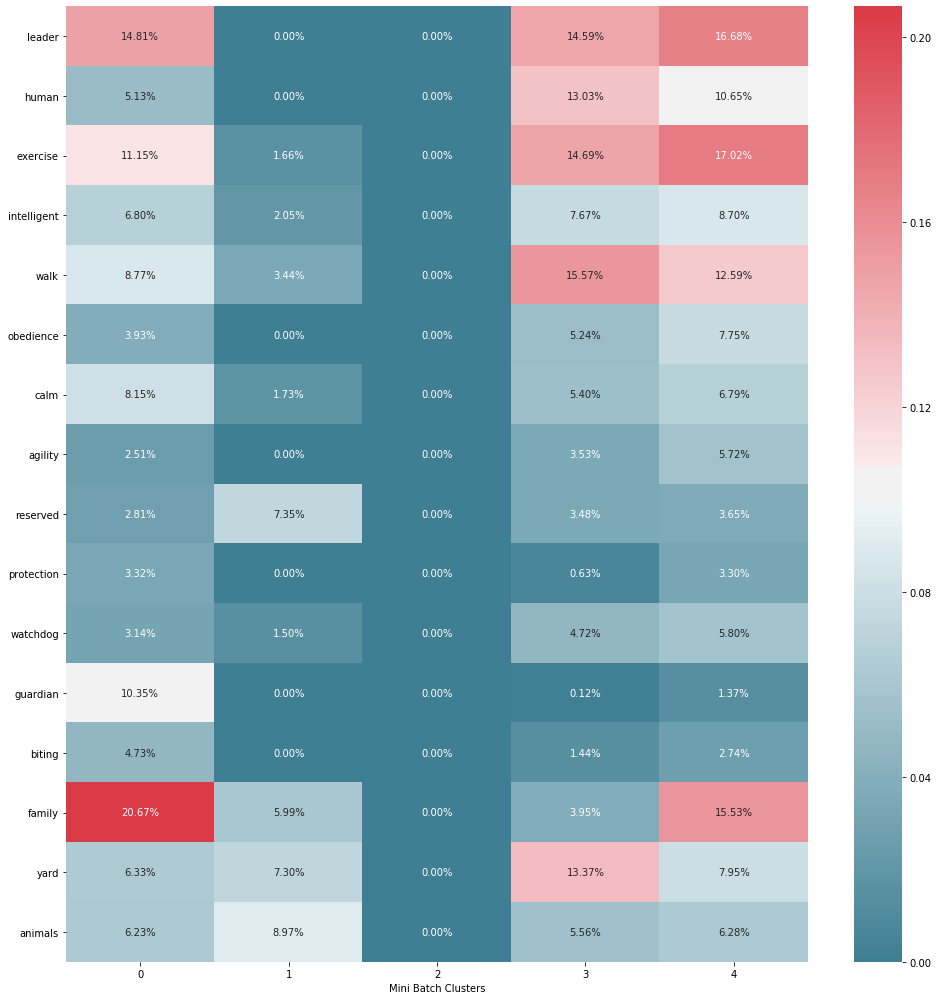

In [120]:
mini_heat_color = sns.diverging_palette(220, 10, as_cmap = True)
#cor = single_heatmap.corr() #Calculate the correlation of the above variables
plt.figure(figsize=(14,14))
sns.heatmap(mini_single_heatmap, annot = True, cmap = mini_heat_color, fmt='.2%')
plt.tight_layout()

Mean Shift

In [121]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(dog_pca, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(dog_pca)

# Extract cluster assignments for each data point.
predict_ms = ms.predict(dog_pca)

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(predict_ms))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 6


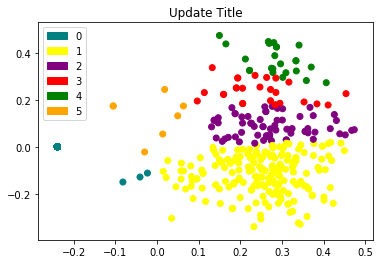

In [122]:
colormap1 = np.array(['teal', 'yellow','purple','red','green','orange'])
plt.scatter(dog_pca[:, 0], dog_pca[:, 1],c=colormap1[predict_ms])

pop_a2 = mpatches.Patch(color='teal', label='0')
pop_b2 = mpatches.Patch(color='yellow', label='1')
pop_c2 = mpatches.Patch(color='purple', label='2')
pop_d2 = mpatches.Patch(color='red', label='3')
pop_e2 = mpatches.Patch(color='green', label='4')
pop_f2 = mpatches.Patch(color='orange', label='5')

plt.legend(handles=[pop_a2,pop_b2,pop_c2,pop_d2,pop_e2,pop_f2])

plt.title('Update Title')
plt.show()

#look into the teal cluster - what is that?

In [123]:
ms_single_features = pd.DataFrame(dogs_draft,columns=vectorizer.get_feature_names())
ms_single_features['Mean Shift Clusters'] = predict_ms

In [124]:
ms_single_features.groupby('Mean Shift Clusters').mean().transpose().sort_values(4,ascending=False)

Mean Shift Clusters,0,1,2,3,4,5
guard,0.000000,0.019657,0.095955,0.246234,0.314602,0.139928
family,0.000000,0.076222,0.181708,0.163869,0.271757,0.081195
humans,0.000000,0.097781,0.129165,0.174078,0.238379,0.041006
guardian,0.000000,0.003694,0.029060,0.091064,0.156760,0.056792
leader,0.000000,0.154272,0.145130,0.179551,0.152804,0.000000
exercise,0.000438,0.160408,0.137209,0.111165,0.104789,0.022173
protect,0.000000,0.010430,0.036708,0.019147,0.091800,0.024032
calm,0.000000,0.058544,0.075700,0.071021,0.090860,0.022224
yard,0.000962,0.117937,0.069102,0.045122,0.079059,0.015089
people,0.000000,0.084590,0.103743,0.074259,0.078670,0.059495


In [125]:
ms_single_heatmap = ms_single_features.groupby('Mean Shift Clusters').mean().transpose().loc[['leader','human','exercise','intelligent','walk','obedience','calm','agility','reserved','protection','watchdog','guardian','biting','family','yard','animals']]
ms_single_heatmap

Mean Shift Clusters,0,1,2,3,4,5
leader,0.000000,0.154272,0.145130,0.179551,0.152804,0.000000
human,0.000000,0.125981,0.074840,0.073092,0.031618,0.000000
exercise,0.000438,0.160408,0.137209,0.111165,0.104789,0.022173
intelligent,0.000000,0.078188,0.096972,0.041981,0.065703,0.058713
walk,0.000910,0.143844,0.115178,0.103295,0.069172,0.036052
obedience,0.000000,0.059772,0.070410,0.035286,0.043711,0.000000
calm,0.000000,0.058544,0.075700,0.071021,0.090860,0.022224
agility,0.000000,0.045010,0.039667,0.028644,0.025198,0.000000
reserved,0.001512,0.035878,0.033151,0.031913,0.023002,0.021116
protection,0.000000,0.010254,0.043278,0.063017,0.019846,0.000000


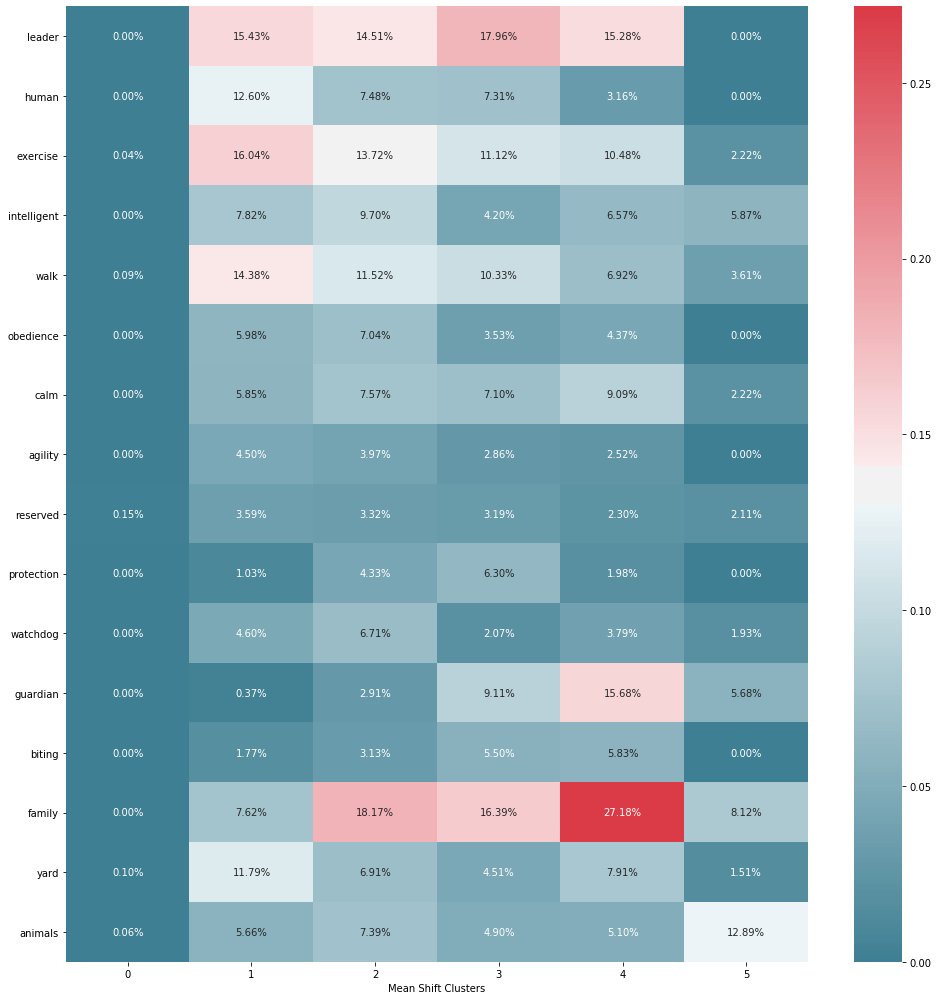

In [126]:
ms_heat_color = sns.diverging_palette(220, 10, as_cmap = True)
#cor = single_heatmap.corr() #Calculate the correlation of the above variables
plt.figure(figsize=(14,14))
sns.heatmap(ms_single_heatmap, annot = True, cmap = mini_heat_color, fmt='.2%')
plt.tight_layout()